# PREDICTING HEART DISEASE

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
#importing required packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import itertools 
import warnings 
warnings.filterwarnings('ignore')
import os 
import io
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import plotly.figure_factory as ff

sns.set()
sns.set(font_scale=1.5)

sns.set_style('whitegrid')
plt.style.use('classic')

%matplotlib inline 

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


EXPLORATORY DATA ANALYSIS 

In [3]:
data.shape

(303, 14)

In [4]:
data.isnull().sum()   #checking for missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#descriptive statistics of the data 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#view database information including shape, type and description name. etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
##count the number of unique values for each of the descriptors 
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

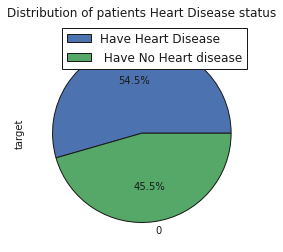

In [8]:
#looking at percentage of people with and with
plt.title('Distribution of patients Heart Disease status')
data['target'].value_counts().plot.pie(autopct='%1.1f%%')
legend=('Have Heart Disease', ' Have No Heart disease')
plt.legend(legend)
plt.show()

The data is a balanced data. patients with diabetes are almost the same as patients without diabetes

ANALYSIS OF CATEGORICAL VARIABLES

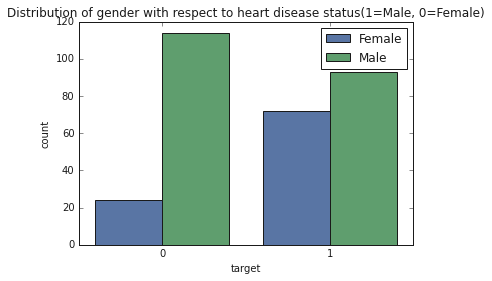

In [9]:
sns.countplot(data['target'], hue=data['sex']).set_title('Distribution of gender with respect to heart disease status(1=Male, 0=Female)')
legend=('Female', 'Male')
plt.legend(legend)
plt.show()
%matplotlib inline

from the chart, it is clear that, for the patients without diabetes, most of them are males. females are at a higher risk of getting heart disease as compared to males since the bar for females with heart disease is higher than that of females without heart disease. The reverse is to the males

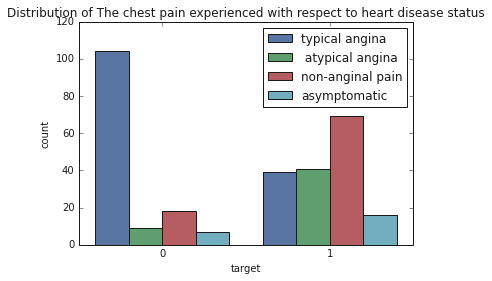

In [10]:
sns.countplot(data['target'], hue=data['cp']).set_title('Distribution of The chest pain experienced with respect to heart disease status')
legend=('typical angina',  ' atypical angina', 'non-anginal pain','asymptomatic')
plt.legend(legend)
plt.show()

most of the pateint with non anginal chest pain have diabetes. patients with typical angina are at a lower risk of contracting heart disease

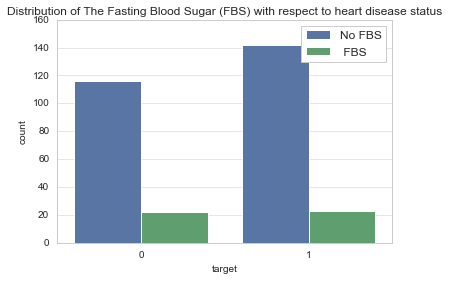

In [52]:
sns.countplot(data['target'], hue=data['fbs']).set_title('Distribution of The Fasting Blood Sugar (FBS) with respect to heart disease status')
legend=('No FBS', ' FBS')
plt.legend(legend)
plt.show()

patients with fasting blood sugar are more likely to get heart dsease as compared to those without fasting blood sugar

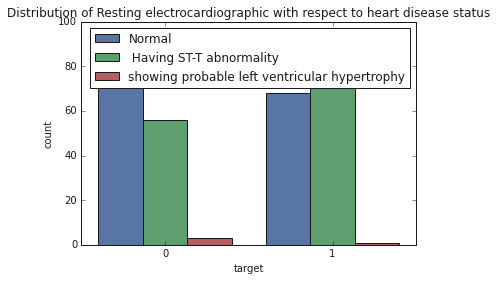

In [12]:
sns.countplot(data['target'], hue=data['restecg']).set_title('Distribution of Resting electrocardiographic with respect to heart disease status')
legend=('Normal', ' Having ST-T abnormality', 'showing probable left ventricular hypertrophy')
plt.legend(legend)
plt.show()

patients having ST-T wave abnormality are more likely to get heart disease, closely followed by those with normal condition with respct to  Resting electrocardiographic 

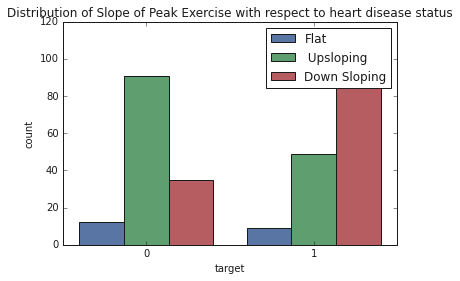

In [13]:
sns.countplot(data['target'], hue=data['slope']).set_title('Distribution of Slope of Peak Exercise with respect to heart disease status')
legend=('Flat', ' Upsloping', 'Down Sloping')
plt.legend(legend)
plt.show()

patients with downsloping peak exercise are more likely of getting a heart disease as compared to those with upsloping and flat. patients with upsloping peak exercise stands a higher chance of not getting the disease

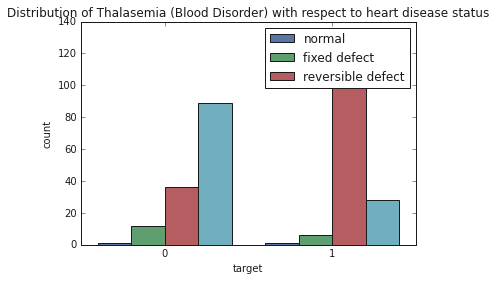

In [14]:
sns.countplot(data['target'], hue=data['thal']).set_title('Distribution of Thalasemia (Blood Disorder) with respect to heart disease status')
legend=('normal',  'fixed defect', 'reversible defect')
plt.legend(legend)
plt.show()

From the graph, it can be deduced that, patients with reversible defects of thalismia blod disorder are at a higher risk of contracting heart disease

ANALYSIS OF NUMERICAL VARIABLES

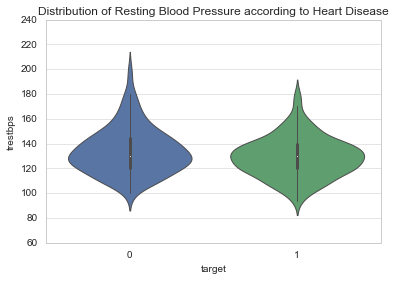

In [15]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['target'],data['trestbps']).set_title('Distribution of Resting Blood Pressure according to Heart Disease')
plt.show()

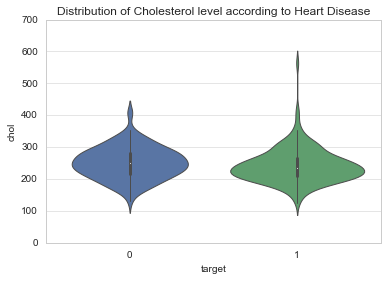

In [16]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['target'],data['chol']).set_title('Distribution of Cholesterol level according to Heart Disease')
plt.show()

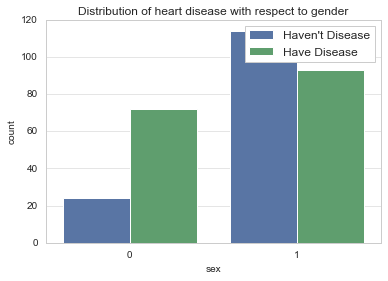

target    0   1
sex            
0        24  72
1       114  93


In [23]:
plt.title('Distribution of heart disease with respect to gender')
sns.countplot(data['sex'],hue=data['target'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()
print(pd.crosstab(data['sex'],data['target']))

In [24]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

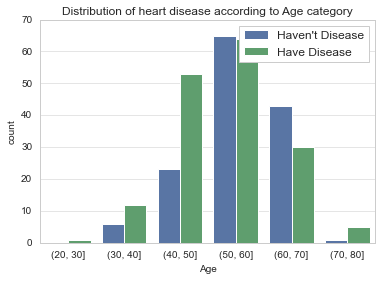

In [25]:
plt.title('Distribution of heart disease according to Age category')
bins=[20,30,40,50,60,70,80]
data['Age']=pd.cut(data['age'],bins)
sns.countplot(data['Age'],hue=data['target'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

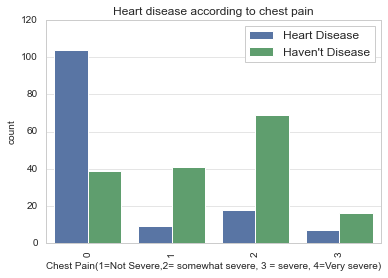

In [26]:
plt.title('Heart disease according to chest pain')
sns.countplot(data['cp'],hue=data['target'])
plt.xlabel('Chest Pain(1=Not Severe,2= somewhat severe, 3 = severe, 4=Very severe)')
plt.legend(["Heart Disease","Haven't Disease"])
plt.xticks(rotation=90)
plt.show()

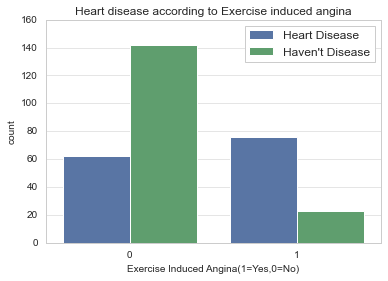

In [27]:
plt.title('Heart disease according to Exercise induced angina')
sns.countplot(data['exang'],hue=data['target'])
plt.xlabel('Exercise Induced Angina(1=Yes,0=No)')
plt.legend(["Heart Disease","Haven't Disease"])
plt.show()

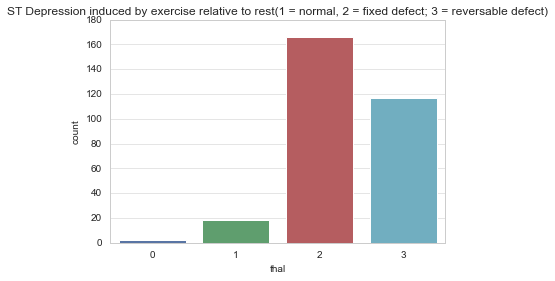

In [28]:
plt.title('ST Depression induced by exercise relative to rest(1 = normal, 2 = fixed defect; 3 = reversable defect)')
sns.countplot(data['thal'])
plt.show()

In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age'],
      dtype='object')

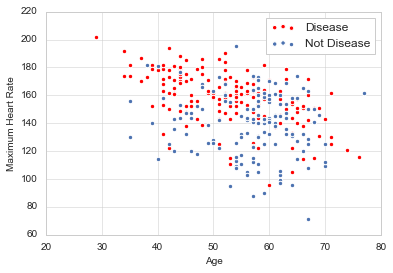

In [30]:
plt.scatter(data.age[data.target==1], data.thalach[(data.target==1)], c="red")
plt.scatter(data.age[data.target==0], data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

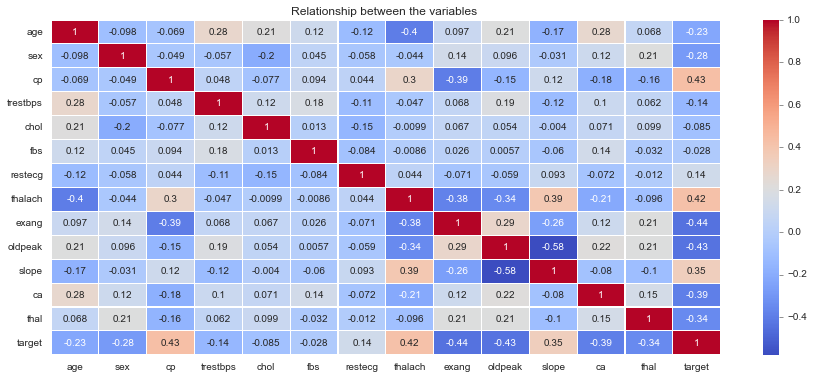

In [31]:
plt.figure(figsize=(15,6))
plt.title('Relationship between the variables ')
sns.heatmap(data.corr(), cmap='coolwarm',linewidths=.1,annot=True)
plt.show()

FEATURES ENGINEERING AND PREPROCESSING

Encoding of categorical variables

# PREDICTIVE ANALYSIS

In [32]:
##label
y=data.iloc[:,13]
#explainatory variables 
X=data.iloc[:,0:13]

In [33]:
#importing libraries for prediction
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
#spliting the datset into test and train 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X Test:',X_test.shape)
print('X Train:',X_train.shape)

X Test: (91, 13)
X Train: (212, 13)


In [35]:
#standardize data
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# LOGISTIC REGRESSION 

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(lr_pred,y_test))
lr_roc_score=roc_auc_score(lr_pred,y_test)
lr_acc=accuracy_score(lr_pred,y_test)
print('Accuracy: ', lr_acc)
print("ROC: ",lr_roc_score)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy:  0.8131868131868132
ROC:  0.811764705882353


# RANDOM FOREST 

In [37]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test))
rf_roc_score=roc_auc_score(rf_pred,y_test)
print(rf_roc_score)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.80      0.82      0.81        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

0.7891156462585033


ADABOOST CLASSIFIER

In [38]:
ada=AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(ada_pred,y_test))
ada_roc_score=roc_auc_score(ada_pred,y_test)
print(ada_roc_score)

              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.70      0.83      0.76        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

0.7636054421768708


# GRADIENT BOOSTING

In [39]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_roc_score=roc_auc_score(gb_pred,y_test)
print(gb_roc_score)


              precision    recall  f1-score   support

           0       0.80      0.73      0.77        45
           1       0.76      0.83      0.79        46

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

0.7797101449275363


# SVM

In [40]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)

print(classification_report(sv_pred,y_test))
sv_roc_score=roc_auc_score(sv_pred,y_test)
print(sv_roc_score)

print(sv.get_params())



              precision    recall  f1-score   support

           0       0.46      0.79      0.58        24
           1       0.90      0.67      0.77        67

    accuracy                           0.70        91
   macro avg       0.68      0.73      0.68        91
weighted avg       0.78      0.70      0.72        91

0.7316542288557214
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# KNN

In [41]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(classification_report(kn_pred,y_test))
kn_roc_score=roc_auc_score(kn_pred,y_test)
kn_acc=accuracy_score(kn_pred,y_test)

print(kn_roc_score)

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        38
           1       0.72      0.68      0.70        53

    accuracy                           0.66        91
   macro avg       0.65      0.66      0.65        91
weighted avg       0.66      0.66      0.66        91

0.6554121151936444


XGBOOST

In [42]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(ada_pred,y_test))
xgb_roc_score=roc_auc_score(xgb_pred,y_test)
print(xgb_roc_score)

[06:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.70      0.83      0.76        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

0.8003875968992249


In [43]:
models=['Logistic Regression', 'Random Forest','XGBoost', 'KNN','Ada Boost','Gradient Boosting', 'SVM']
roc=[lr_roc_score, rf_roc_score, xgb_roc_score, kn_roc_score, ada_roc_score, gb_roc_score, sv_roc_score]
pd.DataFrame(roc, index=models)

,0
Logistic Regression,0.811765
Random Forest,0.789116
XGBoost,0.800388
KNN,0.655412
Ada Boost,0.763605
Gradient Boosting,0.779710
SVM,0.731654


In [44]:
features_label=X.columns
importances=rf.feature_importances_
indices=(np.argsort(importances)[::-1])
for i in range(X.shape[1]):
    print((i+1, 30, features_label[i], importances[indices[i]]))
indices

(1, 30, 'age', 0.14408203015177926)
(2, 30, 'sex', 0.11582915511653548)
(3, 30, 'cp', 0.11227272687179636)
(4, 30, 'trestbps', 0.10489735738974794)
(5, 30, 'chol', 0.09938031400076103)
(6, 30, 'fbs', 0.09022821535401292)
(7, 30, 'restecg', 0.07512336990538138)
(8, 30, 'thalach', 0.07330428496113717)
(9, 30, 'exang', 0.0721939689618646)
(10, 30, 'oldpeak', 0.05348666592453401)
(11, 30, 'slope', 0.028172241981909447)
(12, 30, 'ca', 0.018140967610316965)
(13, 30, 'thal', 0.012888701770223495)


array([11, 12,  9,  7,  2,  8,  0,  4,  3, 10,  1,  6,  5], dtype=int64)

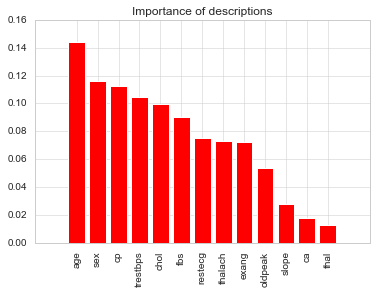

In [45]:
plt.title('Importance of descriptions')
plt.bar(range(X.shape[1]),importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.show()

The above graph shows the descriptors with the highest importance value at the lowest importance value. It shows that the most important descriptors are age, sex (gender), chest pain experienced, resting blood pressure, cholesterol level,  etc.

In [46]:
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [47]:
models = [lr, rf, xgb,sv,gb, kn]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 LogisticRegression : [0.88913043 0.91956522 0.88787185 0.95194508 0.89016018]

 RandomForestClassifier : [0.92608696 0.89891304 0.85812357 0.96796339 0.89702517]
[06:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bina

{'LogisticRegression': [0.91, 0.025076019813461827],
 'RandomForestClassifier': [0.91, 0.03633252632626766],
 'XGBClassifier': [0.9, 0.04145865810775577],
 'SVC': [0.72, 0.08632953534281912],
 'GradientBoostingClassifier': [0.86, 0.04649905291044562],
 'KNeighborsClassifier': [0.67, 0.08606848579884002]}

In this project, I worked on models that predict the possibility of a person having a heart disease or not . During the exploratory data analysis, I found that males are at a higher risk of contracting heart disease  more than females. patients with non anginal pain, fasting blood sugar,  patients with ST-T wave abnormality, patients with downslopingpeak exercise and patients with reversible defect thalismia blood disorder are all at a higher risk of contracting heart disease.

The strongest or major predictors of heart disease are  age, sex (gender), chest pain experienced, resting blood pressure, cholesterol level,  etc. which determines the possibility of a person contracting heart disease.

After using multiple models I ended up with three models (XG Boost, Logistic Regression Random Forest) that performed better than other ML models. I decided to go further with cross validation to prevent overfitting (that this model can be applied perfectly on an unseen data) and to optimize the model to achieve a higher accuracy. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about 91% "Accuracy" with the Random Forest Classifier.

In [49]:
import pickle
file=open('HeartRF.pkl','wb')
#dump the file 
pickle.dump(rf,file)
model=pickle.load(open('HeartRF.pkl','rb'))